<a href="https://colab.research.google.com/github/pathakchiranjit/Reliability/blob/main/Reliability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive Modelling of a repairable system using Data Analytics Tool


<img src="https://github.com/pathakchiranjit/Reliability/blob/main/pics/pic_1.jpg?raw=true" />


Photo by Jen Theodore on Unsplash


Many researchers have presented several estimation techniques for "Reliability" study of a system or product but it rarely gets acceptance in most of the implementations because of its highly esoteric nature and unavailability of user-friendly statistical tools. However, in recent past with the development of "RELIABILITY" python library it becomes simple and easy to execute in real world.

<img src="https://github.com/pathakchiranjit/Reliability/blob/main/pics/pic_2.jpg?raw=true"/>

Photo by JESHOOTS.COM on Unsplash

---

The most unique about repairable systems is its "Availability" (the percentage of time that the product or system is able to perform its required functions). When the required functions cannot be performed because a failure has occurred, the system must be repaired to restore the functionality. The faster the system can be repaired, the greater the availability. Besides "Availability" the other metric used to attribute repairable system is "Mean Time Between Failure (MTBF)" & "Rate of occurrence of failure (ROCOF) / Failure Rate".

<img src="https://github.com/pathakchiranjit/Reliability/blob/main/pics/figure1.png?raw=true"/>



Source: https://reliabilityweb.com

## Table of Contents

1. [Problem Statement](#section1)<br>

2. [Data Loading and Description](#section2)<br>

3. [Preprocessing](#section3)<br>
    - 3.1 [Importing packages](#section301)<br>
    - 3.2 [Label Encoding for Categorical data](#section302)<br>

4. [Goodness of fit of distribution](#section4)<br>
    - 4.1 [Train & Test split](#section401)<br>
    - 4.2 [Fitting distribution](#section402)<br>

5. [Estimation of the Dynamics](#section5)<br>
    - 5.1 [Survival Function](#section501)<br>
    - 5.2 [ROCOF / Failure rate](#section502)<br> 
    - 5.3 [Reliability growth curve](#section503)<br> 
  
6. [Mean Cumulative Function (MCF) estimation](#section6)<br>
    - 6.1 [Parametric model estimation](#section601)<br>
    - 6.2 [Prediction and Model validation](#section602)<br> 
    - 6.3 [Model Evaluation](#section603)<br> 
    
7. [Life expectancy chart](#section7)<br>

8. [Optimal replacement time estimation](#section8)<br>
	
9. [Conclusions](#section9)<br>

10. [Limitations of the study](#section10)<br>

### 1. Problem Statement

The goal is to prepare a __predictive model__ of __machine failure__ using __data analytics tools__.

### 2. Data Loading and Description

Source of the data:

https://bigml.com/user/czuriaga/gallery/dataset/587d062d49c4a16936000810

- The dataset consists of the information about all operating parameters including Operator information also. 
- The dataset comprises of __8,784 observations__.

### 3. Preprocessing

#### 3.1 Importing packages                                          

In [ ]:
!pip install reliability

In [ ]:
#!pip install --upgrade reliability

In [ ]:
from reliability.Fitters import Fit_Everything

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns                                       
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,10)
sns.set()
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()
'''
import warnings
warnings.filterwarnings('ignore')

from subprocess import check_output
'''

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  if __name__ == '__main__':


"\nimport warnings\nwarnings.filterwarnings('ignore')\n\nfrom subprocess import check_output\n"

In [ ]:
file1="https://raw.githubusercontent.com/pathakchiranjit/Machine-Learning/main/Classification/Machine_Failure/Dataset/machine_failure_data.csv"
df_all = pd.read_csv(file1)  
df_all.head(3)

,Date,Temperature,Humidity,Operator,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Failure,﻿Date.year,﻿Date.month,﻿Date.day-of-month,﻿Date.day-of-week,﻿Date.hour,﻿Date.minute,﻿Date.second
0,2016-01-01 00:00:00,67,82,Operator1,291,1,1,1041,846,334,706,1086,256,1295,766,968,1185,1355,1842,90,No,2016,1,1,5,0,0,0
1,2016-01-01 01:00:00,68,77,Operator1,1180,1,1,1915,1194,637,1093,524,919,245,403,723,1446,719,748,91,No,2016,1,1,5,1,0,0
2,2016-01-01 02:00:00,64,76,Operator1,1406,1,1,511,1577,1121,1948,1882,1301,273,1927,1123,717,1518,1689,92,No,2016,1,1,5,2,0,0


In [ ]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(df_all)

,Total,Percent
﻿Date.second,0,0
﻿Date.minute,0,0
Temperature,0,0
Humidity,0,0
Operator,0,0
Measure1,0,0
Measure2,0,0
Measure3,0,0
Measure4,0,0
Measure5,0,0


In [ ]:
data = df_all.copy()

In [ ]:
data.columns

Index(['Date', 'Temperature', 'Humidity', 'Operator', 'Measure1', 'Measure2', 'Measure3', 'Measure4', 'Measure5', 'Measure6', 'Measure7', 'Measure8', 'Measure9', 'Measure10', 'Measure11',
       'Measure12', 'Measure13', 'Measure14', 'Measure15', 'Hours Since Previous Failure', 'Failure', '﻿Date.year', '﻿Date.month', '﻿Date.day-of-month', '﻿Date.day-of-week', '﻿Date.hour',
       '﻿Date.minute', '﻿Date.second'],
      dtype='object')

In [ ]:
data.drop(data.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,21, 22,23,24,25,26,27]], axis = 1, inplace = True)
data.head(3)

,Date,Hours Since Previous Failure,Failure
0,2016-01-01 00:00:00,90,No
1,2016-01-01 01:00:00,91,No
2,2016-01-01 02:00:00,92,No


In [ ]:
data.columns

Index(['Date', 'Hours Since Previous Failure', 'Failure'], dtype='object')

#### 3.2 Label Encoding for Categorical data                                           

In [ ]:
order =['No', 'Yes']

In [ ]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(order)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [ ]:
data['Target_label_encoded']= lb.fit_transform(data.Failure)
data.drop(['Failure'], axis=1,inplace=True)
data.head(3)

,Date,Hours Since Previous Failure,Target_label_encoded
0,2016-01-01 00:00:00,90,0
1,2016-01-01 01:00:00,91,0
2,2016-01-01 02:00:00,92,0


In [ ]:
data.iloc[8780:,:2]

,Date,Hours Since Previous Failure
8780,2016-12-31 20:00:00,8
8781,2016-12-31 21:00:00,9
8782,2016-12-31 22:00:00,10
8783,2016-12-31 23:00:00,11


In [ ]:
data.dtypes

Date                            object
Hours Since Previous Failure    int64 
Target_label_encoded            int64 
dtype: object

In [ ]:
import datetime
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data.dtypes

Date                            datetime64[ns]
Hours Since Previous Failure    int64         
Target_label_encoded            int64         
dtype: object

In [ ]:
range(data.shape[0])

range(0, 8784)

In [ ]:
print(round((((pd.to_datetime('2016-01-02 00:00:01')) - (pd.to_datetime('2016-01-01 00:00:00'))).total_seconds())/3600))

24


In [ ]:
def service_hrs(df):
    a = ((df.Date - pd.to_datetime('2016-01-01 00:00:00')).total_seconds()/3600) + 90
    return a

In [ ]:
data['Service_hrs']=data.apply(service_hrs, axis=1)
data.tail(3)

,Date,Hours Since Previous Failure,Target_label_encoded,Service_hrs
8781,2016-12-31 21:00:00,9,0,8871
8782,2016-12-31 22:00:00,10,0,8872
8783,2016-12-31 23:00:00,11,0,8873


### 4. Goodness of fit of distribution

#### 4.1 Train & Test split                                           

<Figure size 864x864 with 0 Axes>

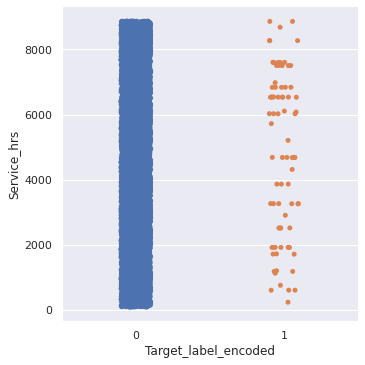

In [ ]:
plt.figure(figsize=(12,12))
sns.catplot(y='Service_hrs', x='Target_label_encoded', data=data)

In [ ]:
data[data.Service_hrs<8001].tail(3)

,Date,Hours Since Previous Failure,Target_label_encoded,Service_hrs
7908,2016-11-25 12:00:00,394,0,7998
7909,2016-11-25 13:00:00,395,0,7999
7910,2016-11-25 14:00:00,396,0,8000


In [ ]:
X_train_data = data.iloc[:7911]
X_test_data = data.iloc[7911:]

In [ ]:
X_train = X_train_data[X_train_data.Target_label_encoded == 1].reset_index(drop=True)
X_test = X_test_data[X_test_data.Target_label_encoded == 1].reset_index(drop=True)

In [ ]:
X_train.shape

(75, 4)

In [ ]:
X_train.tail(5)

,Date,Hours Since Previous Failure,Target_label_encoded,Service_hrs
70,2016-11-08 22:00:00,1,1,7600
71,2016-11-08 23:00:00,1,1,7601
72,2016-11-09 00:00:00,1,1,7602
73,2016-11-09 01:00:00,1,1,7603
74,2016-11-09 02:00:00,1,1,7604


In [ ]:
X_train['Cum_Percent_failure'] = (100* X_train['Target_label_encoded'].cumsum()) / X_train['Target_label_encoded'].sum()

In [ ]:
X_train.tail(3)

,Date,Hours Since Previous Failure,Target_label_encoded,Service_hrs,Cum_Percent_failure
72,2016-11-09 00:00:00,1,1,7602,97.3333
73,2016-11-09 01:00:00,1,1,7603,98.6667
74,2016-11-09 02:00:00,1,1,7604,100


#### 4.2 Fitting distribution                                           

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours Since Previous Failure', ylabel='Density'>

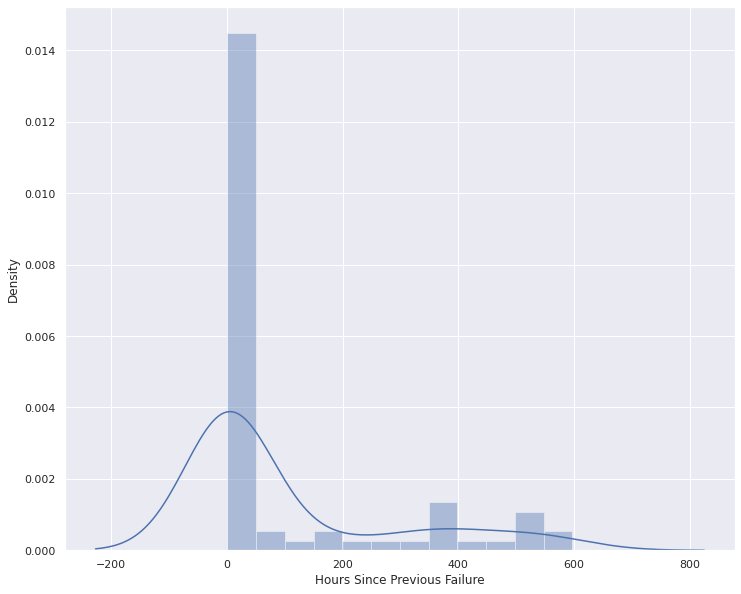

In [ ]:
sns.distplot(X_train['Hours Since Previous Failure'], kde=True)

In [ ]:
X_test.shape

(6, 4)

In [ ]:
X_test

,Date,Hours Since Previous Failure,Target_label_encoded,Service_hrs
0,2016-12-06 20:00:00,666,1,8270
1,2016-12-06 21:00:00,1,1,8271
2,2016-12-06 22:00:00,1,1,8272
3,2016-12-24 01:00:00,411,1,8683
4,2016-12-31 11:00:00,178,1,8861
5,2016-12-31 12:00:00,1,1,8862


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours Since Previous Failure', ylabel='Density'>

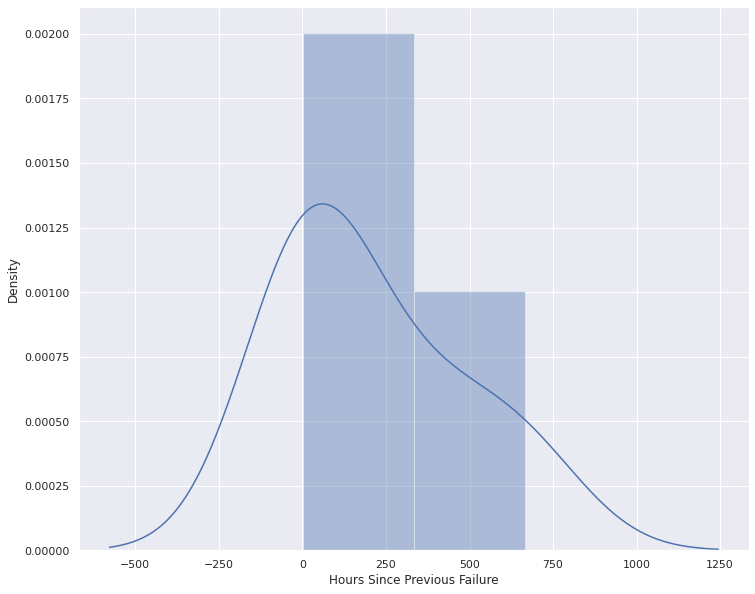

In [ ]:
sns.distplot(X_test['Hours Since Previous Failure'], kde=True)

<AxesSubplot:xlabel='Service_hrs', ylabel='Cum_Percent_failure'>

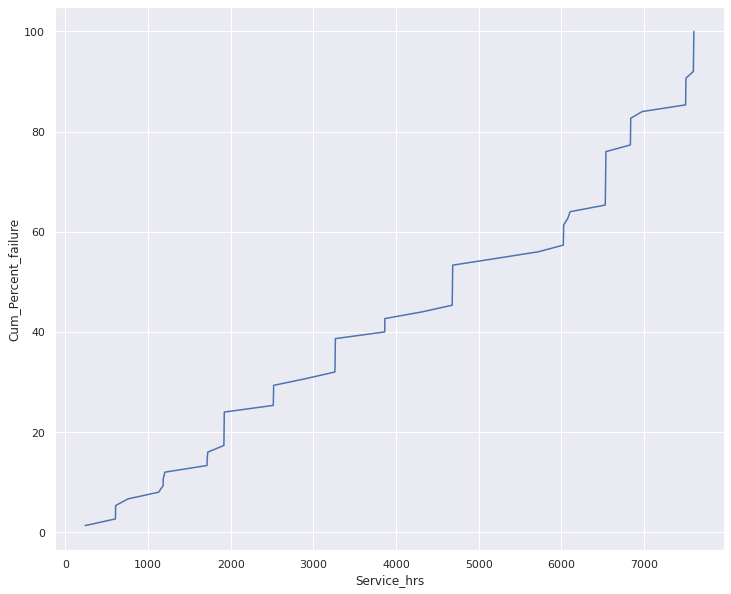

In [ ]:
sns.lineplot(data=X_train, x="Service_hrs", y="Cum_Percent_failure")

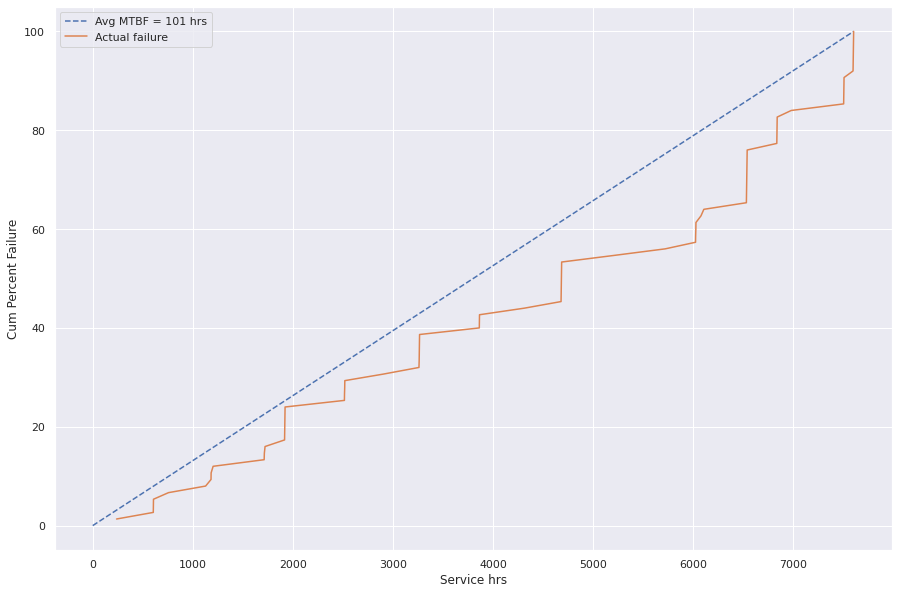

In [ ]:
from matplotlib import pyplot
# plot the precision-recall curves
plt.figure(figsize=(15,10))
pyplot.plot([0, 7604], [0, 100], linestyle='--', label='Avg MTBF = {} hrs'.format(round(7604/75)))
pyplot.plot(X_train.Service_hrs, X_train.Cum_Percent_failure, label='Actual failure')
# axis labels
pyplot.xlabel('Service hrs')
pyplot.ylabel('Cum Percent Failure')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 75/0 (0% right censored) 

   Distribution    Alpha     Beta  Gamma       Mu   Sigma     Lambda  Log-likelihood     AICc      BIC      AD
 Loglogistic_3P 0.167524   0.2441      1                                     978.274 -1950.21  -1943.6 183.078
   Lognormal_3P                   0.9999 -3.88976 6.83081                    41.2033 -76.0685 -69.4541 11.7953
     Weibull_3P  0.72792 0.149811 0.9999                                     34.2168 -62.0955 -55.4811 10.5282
       Gamma_3P  1446.79  0.10686 0.9999                                     33.2693 -60.2006 -53.5862 12.3039
   Lognormal_2P                           1.80088  2.5637                   -312.095  628.357  632.825 12.0029
 Loglogistic_2P  3.95073 0.664366                                           -314.531  633.228  637.697 11.4902
     Weibull_2P  23.9484 0.371213                                           -322.671  649.509  653.978 10.8556
       G

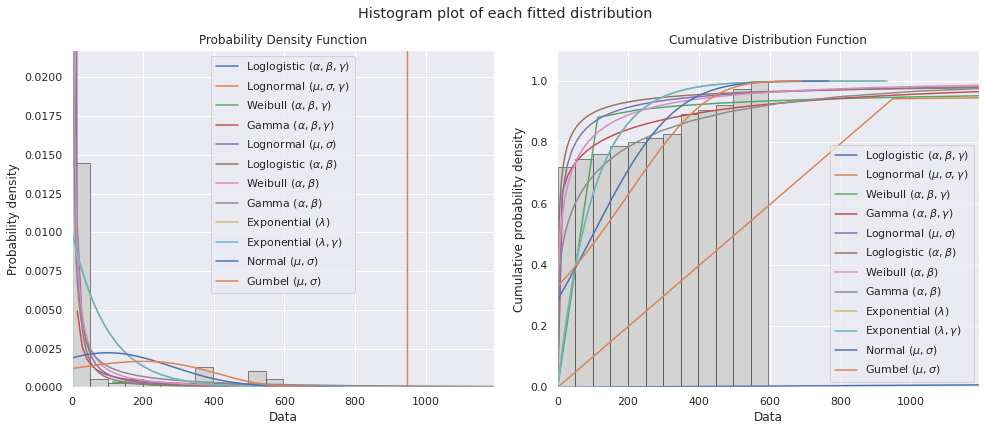

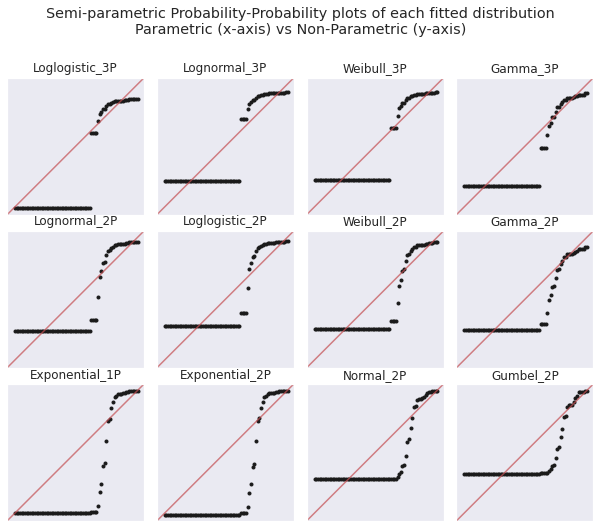

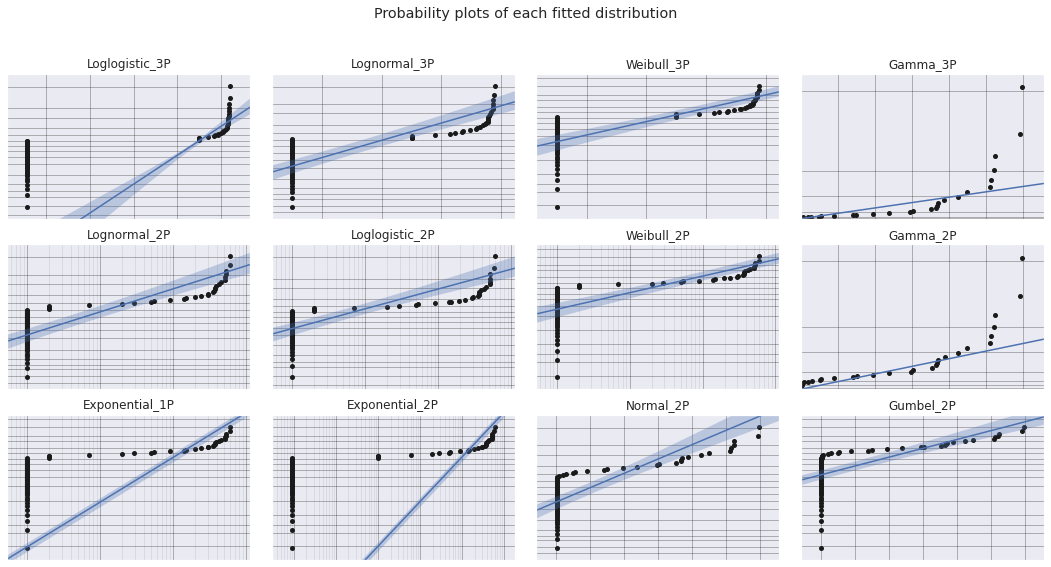

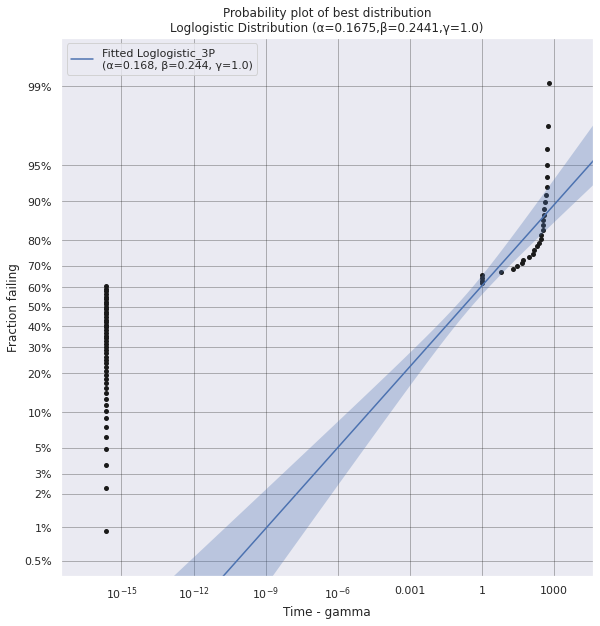

In [ ]:
Fit_Everything(failures=(X_train['Hours Since Previous Failure'].to_numpy()))

Results from Fit_Weibull_Mixture (95% CI):
Analysis method: MLE
Failures / Right censored: 75/0 (0% right censored) 

    Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
      Alpha 1         1.18504       0.0518308   1.08769   1.29111
       Beta 1         3.49744        0.317963   2.92661   4.17961
      Alpha 2         323.419          50.647    237.94   439.604
       Beta 2         1.34099        0.247071  0.934534   1.92422
 Proportion 1        0.665604       0.0546262   0.55165  0.763036 

Goodness of fit    Value
 Log-likelihood -224.543
           AICc  459.955
            BIC  470.673
             AD  7.86061 

Results from Fit_Weibull_2P (95% CI):
Analysis method: Maximum Likelihood Estimation (MLE)
Failures / Right censored: 75/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         23.9484         7.93067    12.514   45.8308
     Beta        0.371213       0.0319763  0.313545  0.439487 

Goodness of fit    Value

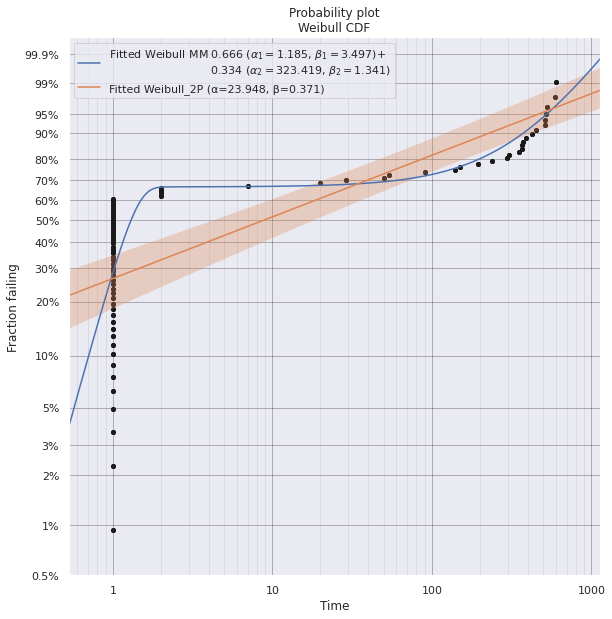

In [ ]:
from reliability.Fitters import Fit_Weibull_Mixture, Fit_Weibull_2P
from reliability.Distributions import Weibull_Distribution
from reliability.Other_functions import histogram, make_right_censored_data
import numpy as np
import matplotlib.pyplot as plt

# fit the Weibull Mixture and Weibull_2P
mixture = Fit_Weibull_Mixture(failures=(X_train['Hours Since Previous Failure'].to_numpy()), show_probability_plot=True, print_results=True)
single = Fit_Weibull_2P(failures=(X_train['Hours Since Previous Failure'].to_numpy()), show_probability_plot=True, print_results=True)
print('Weibull_Mixture BIC:', mixture.BIC, '\nWeibull_2P BIC:', single.BIC) # print the goodness of fit measure



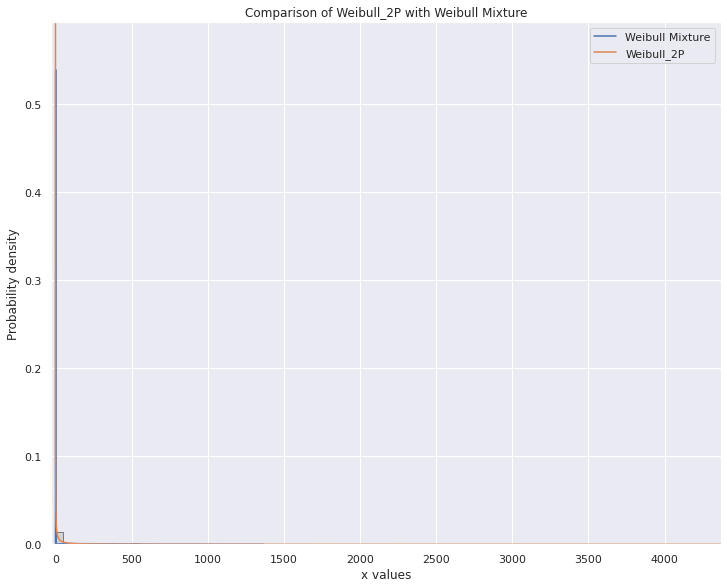

In [ ]:
# plot the Mixture and Weibull_2P
histogram((X_train['Hours Since Previous Failure'].to_numpy()))
mixture.distribution.PDF(label='Weibull Mixture')
single.distribution.PDF(label='Weibull_2P')
plt.title('Comparison of Weibull_2P with Weibull Mixture')
plt.legend()
plt.show()

Results from Fit_Weibull_Mixture (95% CI):
Analysis method: MLE
Failures / Right censored: 75/0 (0% right censored) 

    Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
      Alpha 1         1.18504       0.0518308   1.08769   1.29111
       Beta 1         3.49744        0.317963   2.92661   4.17961
      Alpha 2         323.419          50.647    237.94   439.604
       Beta 2         1.34099        0.247071  0.934534   1.92422
 Proportion 1        0.665604       0.0546262   0.55165  0.763036 

Goodness of fit    Value
 Log-likelihood -224.543
           AICc  459.955
            BIC  470.673
             AD  7.86061 



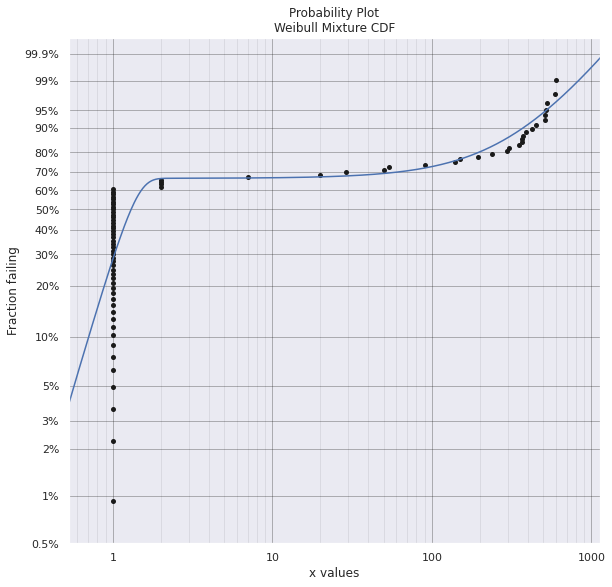

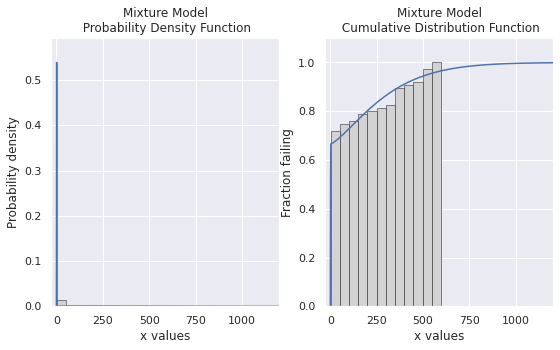

In [ ]:
from reliability.Fitters import Fit_Weibull_Mixture
from reliability.Distributions import Weibull_Distribution
from reliability.Other_functions import histogram
import numpy as np
import matplotlib.pyplot as plt

results = Fit_Weibull_Mixture(failures=(X_train['Hours Since Previous Failure'].to_numpy()), show_probability_plot=True, print_results=True) #fit the mixture model

# this section is to visualise the histogram with PDF and CDF
# it is not part of the default output from the Fitter
plt.figure(figsize=(9, 5))
plt.subplot(121)
histogram(X_train['Hours Since Previous Failure'].to_numpy())
results.distribution.PDF()
plt.subplot(122)
histogram(X_train['Hours Since Previous Failure'].to_numpy(), cumulative=True)
results.distribution.CDF()

plt.show()

Results from Fit_Weibull_CR (95% CI):
Analysis method: MLE
Failures / Right censored: 75/0 (0% right censored) 

Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
  Alpha 1         30.9249         12.2483    14.229   67.2111
   Beta 1        0.327163       0.0332753  0.268034  0.399336
  Alpha 2         524.273         34.7973   460.322   597.109
   Beta 2         6.93167         2.60077    3.3225   14.4614 

Goodness of fit   Value
 Log-likelihood -313.22
           AICc 635.012
            BIC 643.711
             AD 9.86963 



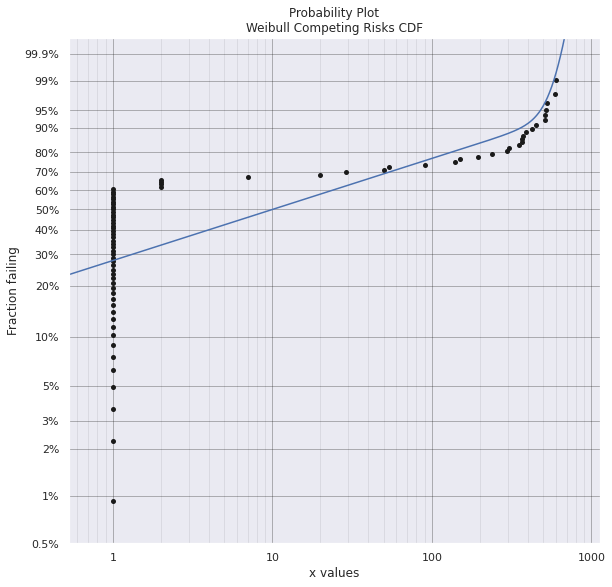

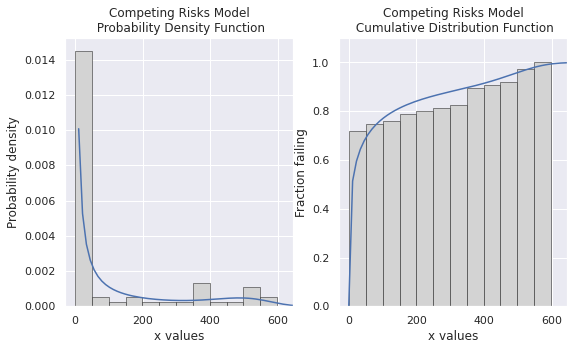

In [ ]:
from reliability.Fitters import Fit_Weibull_CR
from reliability.Distributions import Weibull_Distribution
from reliability.Other_functions import histogram
import numpy as np
import matplotlib.pyplot as plt

results_cr = Fit_Weibull_CR(failures=(X_train['Hours Since Previous Failure'].to_numpy())) #fit the mixture model

# this section is to visualise the histogram with PDF and CDF
# it is not part of the default output from the Fitter
plt.figure(figsize=(9, 5))
plt.subplot(121)
histogram(X_train['Hours Since Previous Failure'].to_numpy())
results_cr.distribution.PDF()
plt.subplot(122)
histogram(X_train['Hours Since Previous Failure'].to_numpy(), cumulative=True)
results_cr.distribution.CDF()

plt.show()

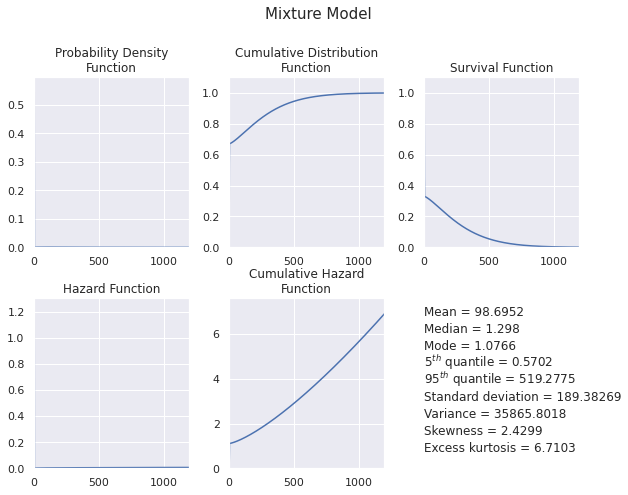

In [ ]:
from reliability.Distributions import Normal_Distribution, Lognormal_Distribution,  Mixture_Model
from reliability.Reliability_testing import chi2test
import numpy as np

# create the mixture model
d1 = Weibull_Distribution(alpha=1.18504, beta=3.497)
d2 = Weibull_Distribution(alpha=323.4, beta=1.341)
mixture_model = Mixture_Model(distributions=[d1, d2], proportions=[0.67, 0.33])
mixture_model.plot()

In [ ]:
data_dist = mixture_model.random_samples(81)

In [ ]:
from scipy import stats
stats.chisquare(new_test['Hours Since Previous Failure'].to_numpy(), data_dist)

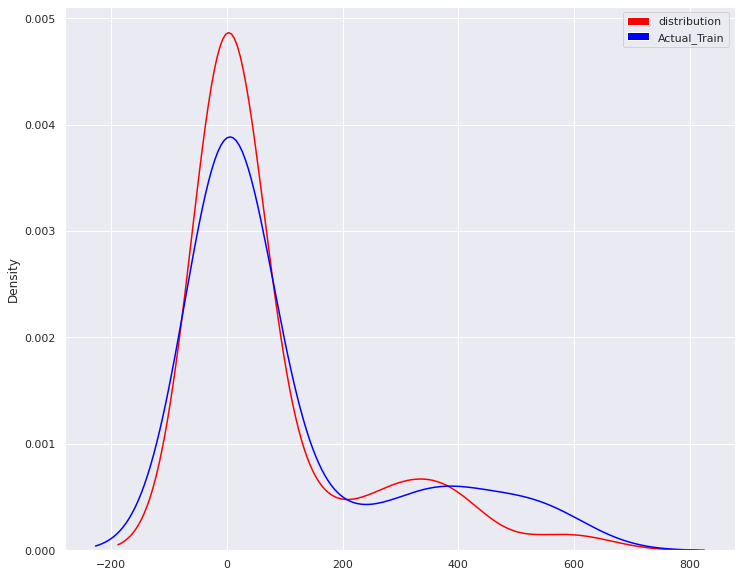

In [ ]:
import matplotlib.patches as mpatches 
sns.kdeplot(x=data_dist, color="red", shade=False)
sns.kdeplot(x=X_train['Hours Since Previous Failure'].to_numpy(), color="blue", shade=False)

handles = [mpatches.Patch(facecolor='red', label="distribution"),
           mpatches.Patch(facecolor='blue', label="Actual_Train")]
plt.legend(handles=handles)
plt.show()

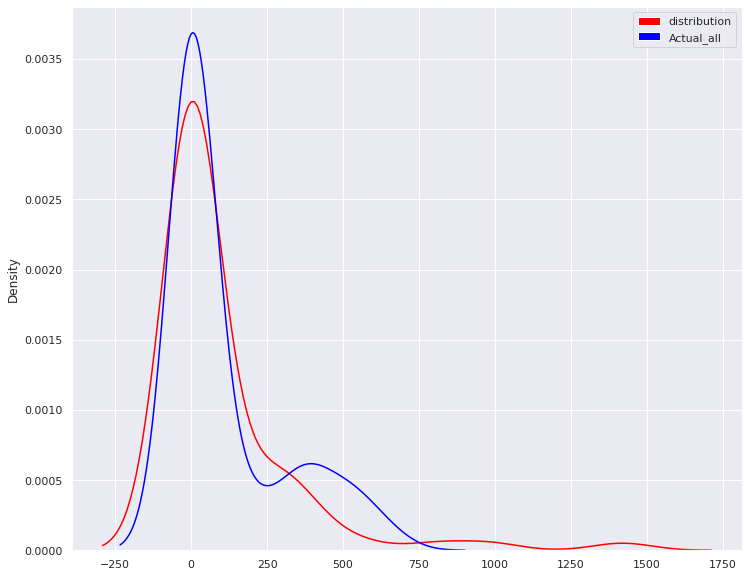

In [ ]:
import matplotlib.patches as mpatches
data_dist_1 = mixture_model.random_samples(81) 
sns.kdeplot(x=data_dist_1, color="red", shade=False)
sns.kdeplot(x=new_test['Hours Since Previous Failure'].to_numpy(), color="blue", shade=False)

handles = [mpatches.Patch(facecolor='red', label="distribution"),
           mpatches.Patch(facecolor='blue', label="Actual_all")]
plt.legend(handles=handles)
plt.show()

### 5. Estimation of the Dynamics

#### 5.1 Survival Function                                           

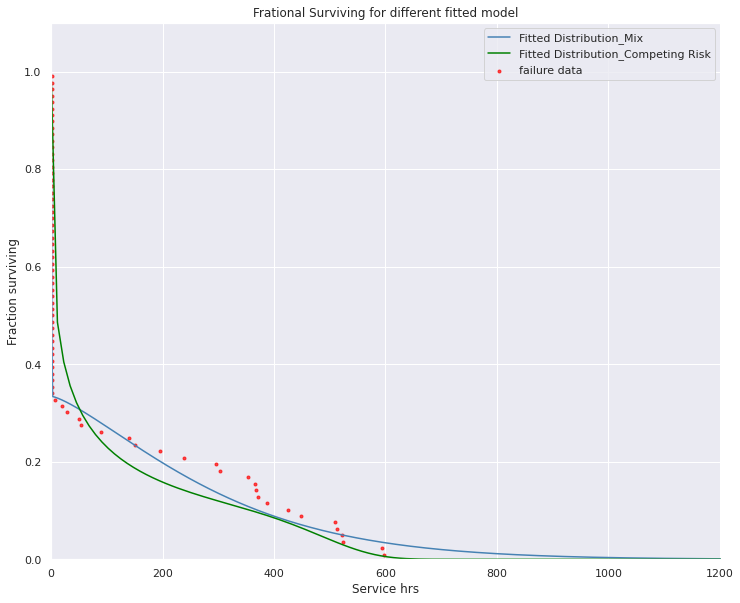

In [ ]:
from reliability.Distributions import Weibull_Distribution
from reliability.Fitters import Fit_Weibull_2P
from reliability.Probability_plotting import plot_points
import matplotlib.pyplot as plt

data = X_train['Hours Since Previous Failure'].to_numpy()
results.distribution.SF(label='Fitted Distribution_Mix',color='steelblue')
results_cr.distribution.SF(label='Fitted Distribution_Competing Risk',color='green')
plot_points(failures=data,func='SF',label='failure data',color='red',alpha=0.7)
pyplot.xlabel('Service hrs')
pyplot.title('Frational Surviving for different fitted model')
plt.legend()
plt.show()

#### 5.2 ROCOF / Failure rate                                           

Results from ROCOF analysis:
Laplace test results: U = 2.882, z_crit = (-1.96,+1.96)
At 95% confidence level the ROCOF is WORSENING. Assume NHPP.
ROCOF assuming NHPP has parameters: Beta_hat = 1.387 , Lambda_hat = 0.0003118


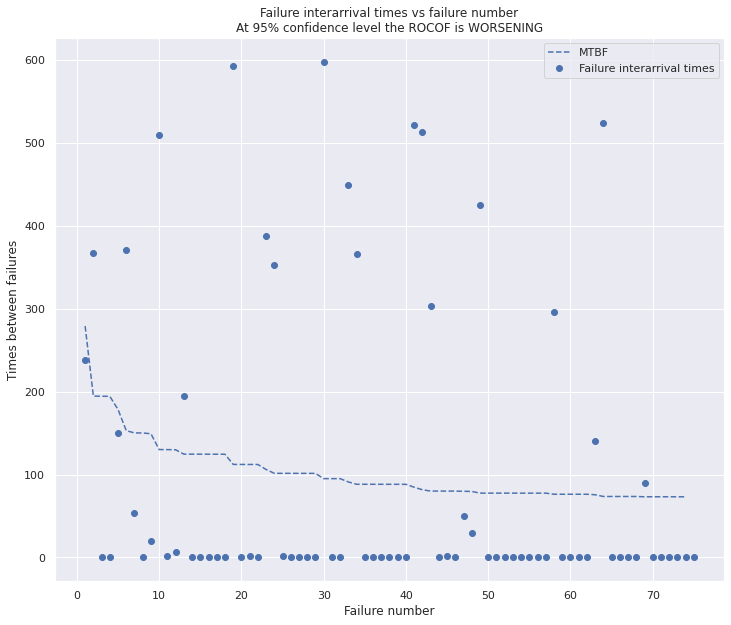

<Figure size 864x720 with 0 Axes>

In [ ]:
from reliability.Repairable_systems import ROCOF
import matplotlib.pyplot as plt
t = X_train['Hours Since Previous Failure'].to_numpy()
ROCOF(times_between_failures=t)
f = plt.figure()
f.set_figwidth(12)
f.set_figheight(10)
plt.show()

Results from ROCOF analysis:
Laplace test results: U = 2.882, z_crit = (-1.96,+1.96)
At 95% confidence level the ROCOF is WORSENING. Assume NHPP.
ROCOF assuming NHPP has parameters: Beta_hat = 1.387 , Lambda_hat = 0.0003118


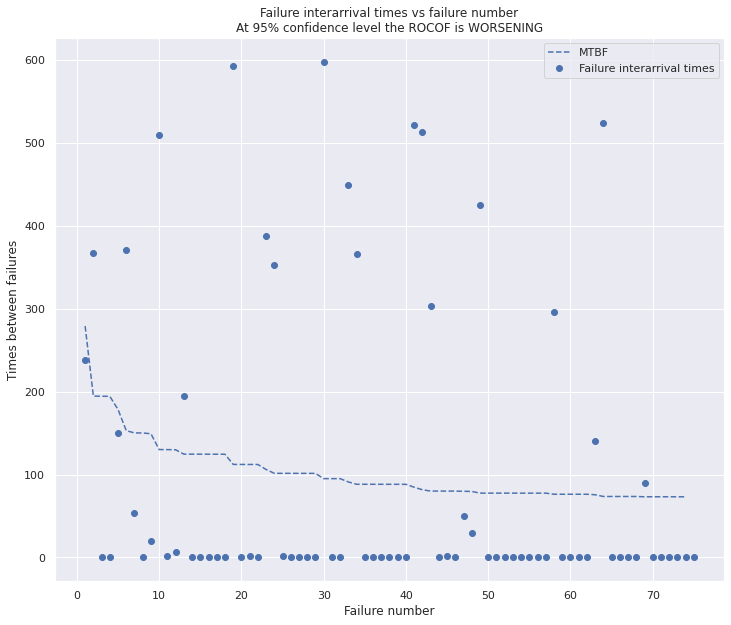

<Figure size 720x576 with 0 Axes>

In [ ]:
from reliability.Repairable_systems import ROCOF
import matplotlib.pyplot as plt
t = X_train['Service_hrs'].to_numpy()
ROCOF(failure_times=t)
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
plt.show()

#### 5.3 Reliability growth curve                                           

Reliability growth model parameters:
lambda: 0.0017945865785832457
beta: 1.1784879205374597
Time to reach target MTBF: 3533.7741930513985


ValueError: ignored

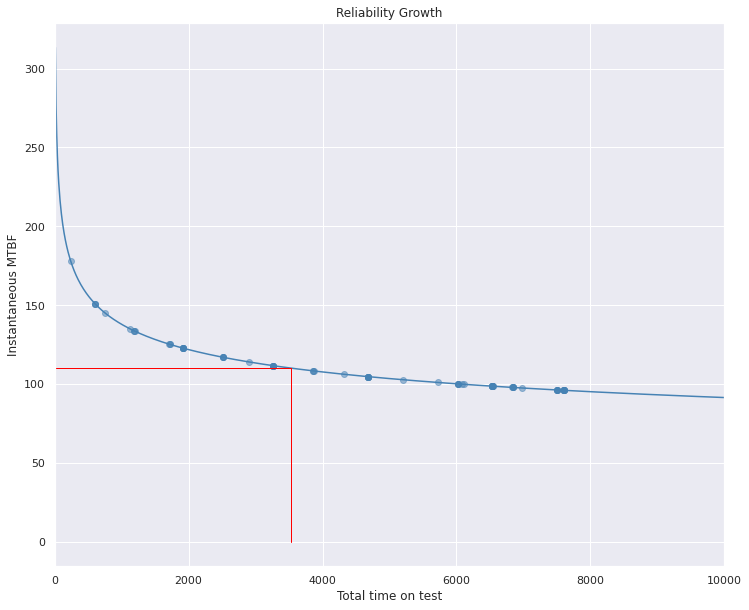

In [ ]:
from reliability.Repairable_systems import reliability_growth
import matplotlib.pyplot as plt
times = X_train['Service_hrs'].to_numpy()
reliability_growth(times=times,target_MTBF=110,label='Reliability growth curve',xmax= 10000)
#plt.xlim(0,1000)
plt.legend()
plt.show()

### 6. Mean Cumulative Function (MCF) estimation

#### 6.1 Parametric model estimation                                           

Mean Cumulative Function Parametric Model (95% CI):
MCF = (t/α)^β
Parameter  Point Estimate  Standard Error  Lower CI  Upper CI
    Alpha         212.088         19.6411   176.884   254.299
     Beta         1.17239       0.0319597   1.11139   1.23673 

Since Beta is greater than 1, the system repair rate is WORSENING over time.


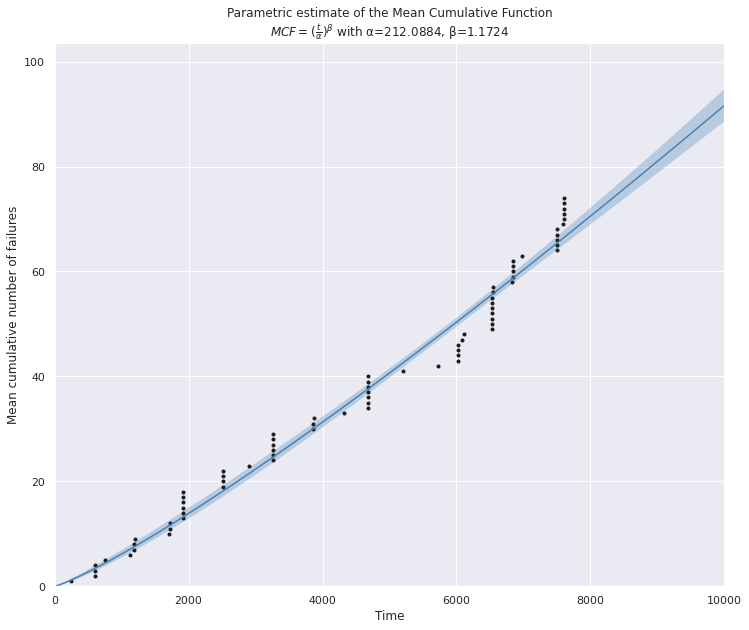

In [ ]:
from reliability.Repairable_systems import MCF_parametric
import matplotlib.pyplot as plt
times = [X_train['Service_hrs'].to_numpy()]
MCF_parametric(data=times)
plt.xlim(0,10000)
plt.show()

#### 6.2 Prediction and Model validation                                           

In [ ]:
X_train.head(3)

,Date,Hours Since Previous Failure,Target_label_encoded,Service_hrs,Cum_Percent_failure
0,2016-01-07 04:00:00,238,1,238,1.33333
1,2016-01-22 11:00:00,367,1,605,2.66667
2,2016-01-22 12:00:00,1,1,606,4


In [ ]:
X_test

,Date,Hours Since Previous Failure,Target_label_encoded,Service_hrs
0,2016-12-06 20:00:00,666,1,8270
1,2016-12-06 21:00:00,1,1,8271
2,2016-12-06 22:00:00,1,1,8272
3,2016-12-24 01:00:00,411,1,8683
4,2016-12-31 11:00:00,178,1,8861
5,2016-12-31 12:00:00,1,1,8862


In [ ]:
new_test = X_train.copy()
new_test.drop(['Cum_Percent_failure'],axis =1,inplace = True)
new_test.tail(3)

,Date,Hours Since Previous Failure,Target_label_encoded,Service_hrs
72,2016-11-09 00:00:00,1,1,7602
73,2016-11-09 01:00:00,1,1,7603
74,2016-11-09 02:00:00,1,1,7604


In [ ]:
new_test=new_test.append(X_test,ignore_index=True)

In [ ]:
new_test['MCF'] = (new_test['Service_hrs'] / 212 )**1.17
new_test['Actual_Cum_failure'] = new_test['Target_label_encoded'].cumsum()
new_test['Cum_Percent_failure_Actual'] = (100* new_test['Target_label_encoded'].cumsum()) / new_test['Target_label_encoded'].sum()

In [ ]:
new_test.tail(10)

,Date,Hours Since Previous Failure,Target_label_encoded,Service_hrs,MCF,Actual_Cum_failure,Cum_Percent_failure_Actual
71,2016-11-08 23:00:00,1,1,7601,65.8879,72,88.8889
72,2016-11-09 00:00:00,1,1,7602,65.8981,73,90.1235
73,2016-11-09 01:00:00,1,1,7603,65.9082,74,91.358
74,2016-11-09 02:00:00,1,1,7604,65.9183,75,92.5926
75,2016-12-06 20:00:00,666,1,8270,72.7224,76,93.8272
76,2016-12-06 21:00:00,1,1,8271,72.7327,77,95.0617
77,2016-12-06 22:00:00,1,1,8272,72.743,78,96.2963
78,2016-12-24 01:00:00,411,1,8683,76.9894,79,97.5309
79,2016-12-31 11:00:00,178,1,8861,78.8391,80,98.7654
80,2016-12-31 12:00:00,1,1,8862,78.8495,81,100


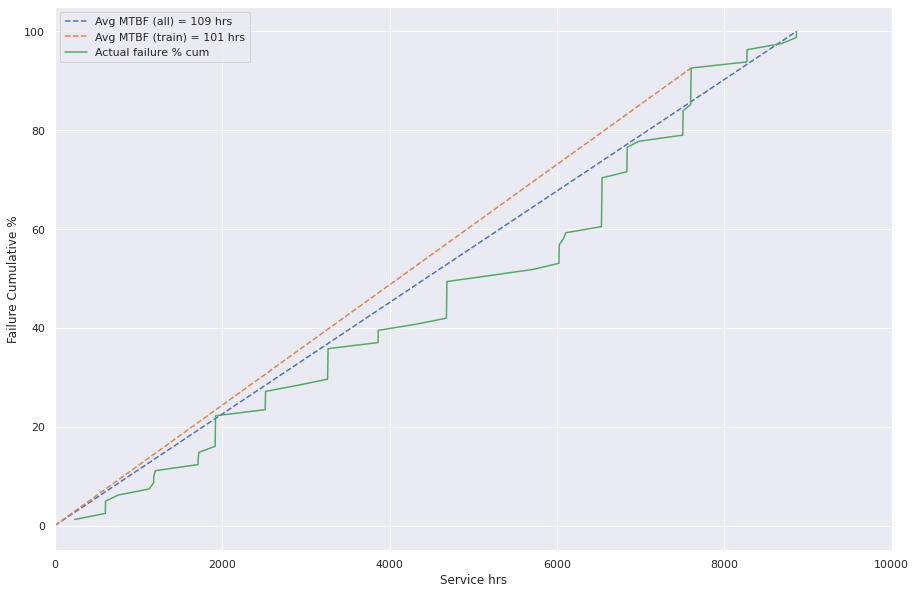

In [ ]:
from matplotlib import pyplot
# plot the cumulative faiure
plt.figure(figsize=(15,10))
pyplot.plot([0, 8862], [0, 100], linestyle='--', label='Avg MTBF (all) = {} hrs'.format(round(8862/81)))
pyplot.plot([0, 7604], [0, 92.6], linestyle='--', label='Avg MTBF (train) = {} hrs'.format(round(7604/75)))
pyplot.plot(new_test.Service_hrs, new_test.Cum_Percent_failure_Actual, label='Actual failure % cum')
plt.xlim(0,10000)
# axis labels
pyplot.xlabel('Service hrs')
pyplot.ylabel('Failure Cumulative %')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

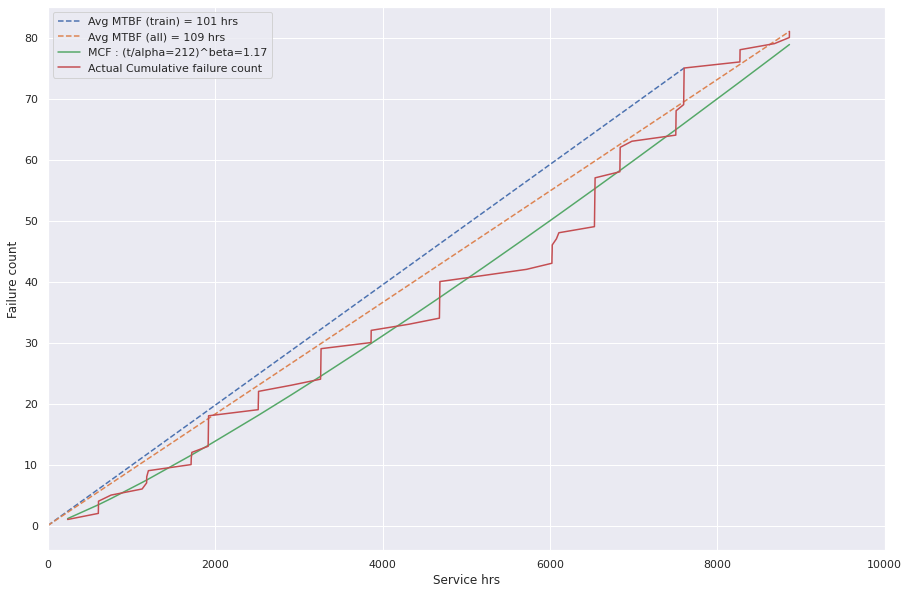

In [ ]:
from matplotlib import pyplot
# plot the MCF of the system
plt.figure(figsize=(15,10))
pyplot.plot([0, 7604], [0, 75], linestyle='--', label='Avg MTBF (train) = {} hrs'.format(round(7604/75)))
pyplot.plot([0, 8862], [0, 81], linestyle='--', label='Avg MTBF (all) = {} hrs'.format(round(8862/81)))
pyplot.plot(new_test.Service_hrs, new_test.MCF, label='MCF : (t/alpha=212)^beta=1.17')
pyplot.plot(new_test.Service_hrs, new_test.Actual_Cum_failure, label='Actual Cumulative failure count')
plt.xlim(0,10000)
# axis labels
pyplot.xlabel('Service hrs')
pyplot.ylabel('Failure count')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
X_test

,Date,Hours Since Previous Failure,Target_label_encoded,Service_hrs
0,2016-12-06 20:00:00,666,1,8270
1,2016-12-06 21:00:00,1,1,8271
2,2016-12-06 22:00:00,1,1,8272
3,2016-12-24 01:00:00,411,1,8683
4,2016-12-31 11:00:00,178,1,8861
5,2016-12-31 12:00:00,1,1,8862


### 7. Life expectancy chart

In [ ]:
def calc(x):
  run_life = [10,50,100,200,300,400,500,600,700,800,1000]
  dic_r ={}
  for j in run_life:
    strtt = x
    endt = x + j
    CS_1_2 = results.distribution.SF([float(endt)])[0] / results.distribution.SF([float(strtt)])[0]
    CF_1_2 = (1 - CS_1_2)*100
    dic_r[j] = round(CF_1_2,2)
  return dic_r

Empty DataFrame
Columns: []
Index: []


,10,50,100,200,300,400,500,600,700,800,1000,Service_hrs
0,1.440000,9.060000,20.230000,42.360000,60.750000,74.460000,84.000000,90.290000,94.280000,96.710000,98.990000,10
1,2.240000,11.790000,24.050000,46.540000,64.300000,77.130000,85.860000,91.530000,95.060000,97.190000,99.150000,50
2,2.790000,13.900000,27.220000,50.190000,67.450000,79.530000,87.550000,92.640000,95.760000,97.620000,99.300000,100
3,3.170000,15.470000,29.610000,52.990000,69.890000,81.390000,88.840000,93.490000,96.300000,97.940000,99.400000,150
4,3.490000,16.730000,31.560000,55.280000,71.880000,82.890000,89.890000,94.180000,96.730000,98.200000,99.490000,200
5,3.980000,18.750000,34.660000,58.910000,75.000000,85.220000,91.490000,95.220000,97.370000,98.590000,99.610000,300
6,4.380000,20.350000,37.110000,61.730000,77.380000,86.980000,92.680000,95.980000,97.840000,98.860000,99.700000,400


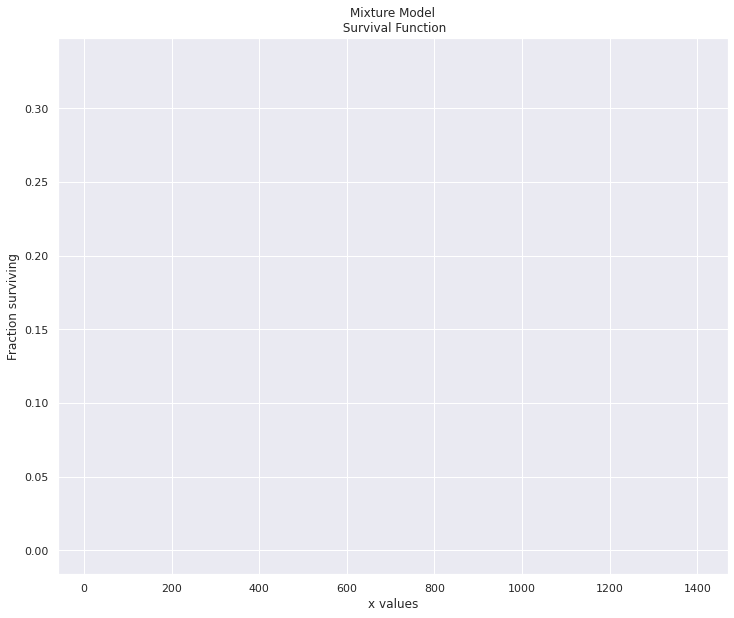

In [ ]:
serv_life = [10,50,100,150,200,300,400]
df_skew = pd.DataFrame()
print(df_skew)  
# append rows to an empty DataFrame
for i in serv_life:
  d1 = pd.DataFrame.from_dict(calc(i),orient ='index').T
  d1['Service_hrs'] = str(i)
  df_skew = df_skew.append(d1,ignore_index=True)
df_skew.style.background_gradient("Blues",text_color_threshold=0.6)

In [ ]:
df_skew

,10,50,100,200,300,400,500,600,700,800,1000,Service_hrs
0,1.44,9.06,20.23,42.36,60.75,74.46,84,90.29,94.28,96.71,98.99,10
1,2.24,11.79,24.05,46.54,64.3,77.13,85.86,91.53,95.06,97.19,99.15,50
2,2.79,13.9,27.22,50.19,67.45,79.53,87.55,92.64,95.76,97.62,99.3,100
3,3.17,15.47,29.61,52.99,69.89,81.39,88.84,93.49,96.3,97.94,99.4,150
4,3.49,16.73,31.56,55.28,71.88,82.89,89.89,94.18,96.73,98.2,99.49,200
5,3.98,18.75,34.66,58.91,75,85.22,91.49,95.22,97.37,98.59,99.61,300
6,4.38,20.35,37.11,61.73,77.38,86.98,92.68,95.98,97.84,98.86,99.7,400


In [ ]:
df= df_skew.copy()
df.set_index ('Service_hrs',inplace=True)
df.columns = [str(col) + '_hrs_expectency' for col in df.columns]
df.style.background_gradient("Blues")

,10_hrs_expectency,50_hrs_expectency,100_hrs_expectency,200_hrs_expectency,300_hrs_expectency,400_hrs_expectency,500_hrs_expectency,600_hrs_expectency,700_hrs_expectency,800_hrs_expectency,1000_hrs_expectency
Service_hrs,,,,,,,,,,,
10,1.440000,9.060000,20.230000,42.360000,60.750000,74.460000,84.000000,90.290000,94.280000,96.710000,98.990000
50,2.240000,11.790000,24.050000,46.540000,64.300000,77.130000,85.860000,91.530000,95.060000,97.190000,99.150000
100,2.790000,13.900000,27.220000,50.190000,67.450000,79.530000,87.550000,92.640000,95.760000,97.620000,99.300000
150,3.170000,15.470000,29.610000,52.990000,69.890000,81.390000,88.840000,93.490000,96.300000,97.940000,99.400000
200,3.490000,16.730000,31.560000,55.280000,71.880000,82.890000,89.890000,94.180000,96.730000,98.200000,99.490000
300,3.980000,18.750000,34.660000,58.910000,75.000000,85.220000,91.490000,95.220000,97.370000,98.590000,99.610000
400,4.380000,20.350000,37.110000,61.730000,77.380000,86.980000,92.680000,95.980000,97.840000,98.860000,99.700000


In [ ]:
df

,10_hrs_expectency,50_hrs_expectency,100_hrs_expectency,200_hrs_expectency,300_hrs_expectency,400_hrs_expectency,500_hrs_expectency,600_hrs_expectency,700_hrs_expectency,800_hrs_expectency,1000_hrs_expectency
Service_hrs,,,,,,,,,,,
10,1.44,9.06,20.23,42.36,60.75,74.46,84,90.29,94.28,96.71,98.99
50,2.24,11.79,24.05,46.54,64.3,77.13,85.86,91.53,95.06,97.19,99.15
100,2.79,13.9,27.22,50.19,67.45,79.53,87.55,92.64,95.76,97.62,99.3
150,3.17,15.47,29.61,52.99,69.89,81.39,88.84,93.49,96.3,97.94,99.4
200,3.49,16.73,31.56,55.28,71.88,82.89,89.89,94.18,96.73,98.2,99.49
300,3.98,18.75,34.66,58.91,75,85.22,91.49,95.22,97.37,98.59,99.61
400,4.38,20.35,37.11,61.73,77.38,86.98,92.68,95.98,97.84,98.86,99.7


<Figure size 1440x864 with 0 Axes>

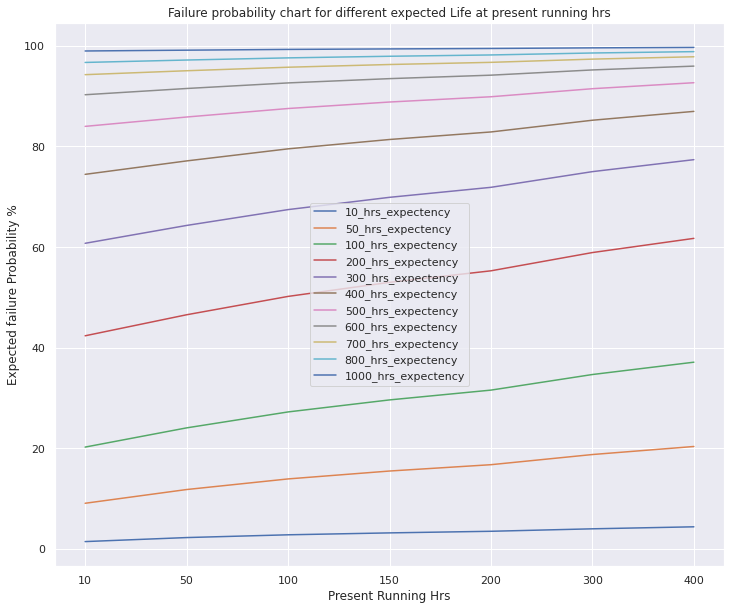

In [ ]:
plt.figure(figsize=(20,12))
df.plot.line()
plt.xlabel("Present Running Hrs")
plt.ylabel("Expected failure Probability %")
plt.title("Failure probability chart for different expected Life at present running hrs")
plt.show()

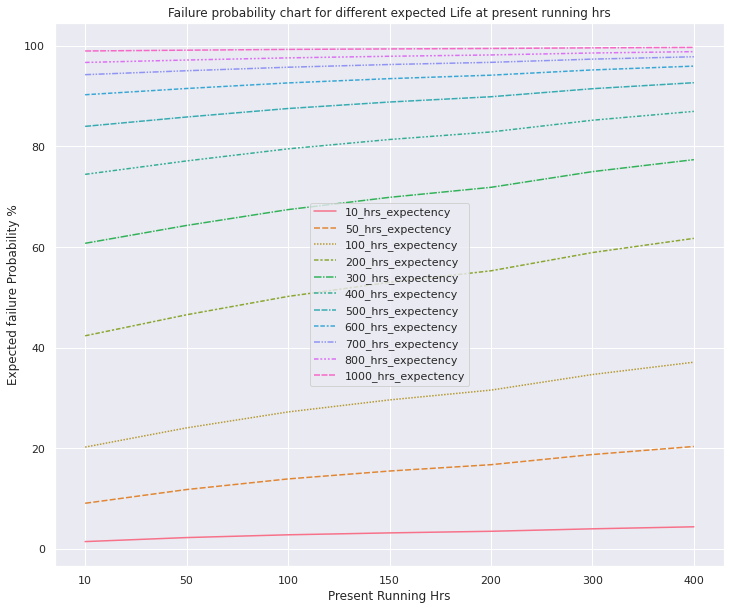

In [ ]:
sns.lineplot(data=df)
plt.xlabel("Present Running Hrs")
plt.ylabel("Expected failure Probability %")
plt.title("Failure probability chart for different expected Life at present running hrs")
plt.show()

### 8. Optimal replacement time estimation

Results from optimal_replacement_time:
Cost model assuming as good as old replacement (q=1):
The minimum cost per unit time is 0.43 
The optimal replacement time is 194.24
Results from optimal_replacement_time:
Cost model assuming as good as old replacement (q=1):
The minimum cost per unit time is 0.57 
The optimal replacement time is 234.41
Results from optimal_replacement_time:
Cost model assuming as good as old replacement (q=1):
The minimum cost per unit time is 0.32 
The optimal replacement time is 158.34


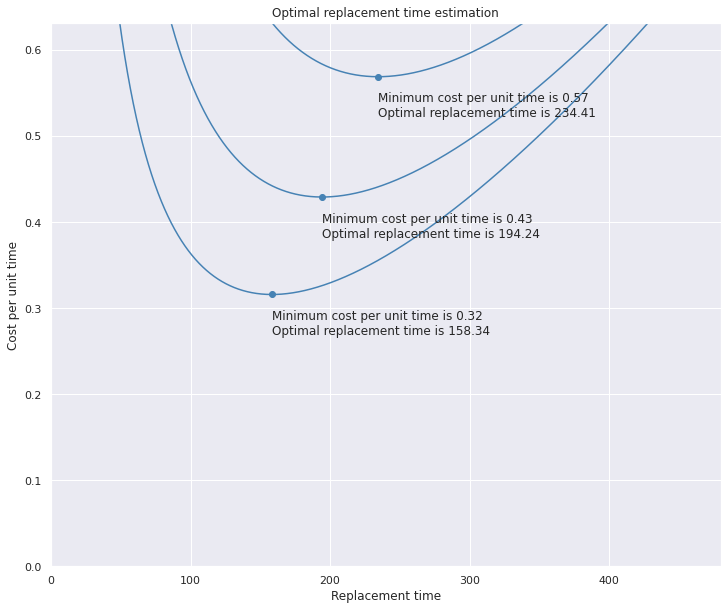

In [ ]:
from reliability.Repairable_systems import optimal_replacement_time
import matplotlib.pyplot as plt
plt.subplot (111)
optimal_replacement_time(cost_PM=10, cost_CM=50, weibull_alpha=120, weibull_beta=2.5,q=1)
optimal_replacement_time(cost_PM=10, cost_CM=80, weibull_alpha=120, weibull_beta=2.5,q=1)
optimal_replacement_time(cost_PM=10, cost_CM=30, weibull_alpha=120, weibull_beta=2.5,q=1)
plt.show()

Results from optimal_replacement_time:
Cost model assuming as good as old replacement (q=1):
The minimum cost per unit time is 4.29 
The optimal replacement time is 194.24
Results from optimal_replacement_time:
Cost model assuming as good as old replacement (q=1):
The minimum cost per unit time is 5.69 
The optimal replacement time is 234.41
Results from optimal_replacement_time:
Cost model assuming as good as old replacement (q=1):
The minimum cost per unit time is 3.16 
The optimal replacement time is 158.34


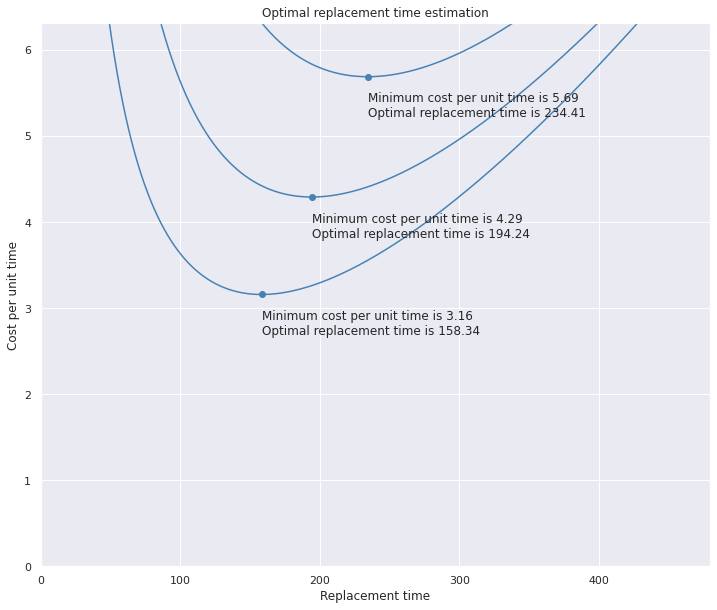

In [ ]:
from reliability.Repairable_systems import optimal_replacement_time
import matplotlib.pyplot as plt
plt.subplot (111)
optimal_replacement_time(cost_PM=100, cost_CM=500, weibull_alpha=120, weibull_beta=2.5,q=1)
optimal_replacement_time(cost_PM=100, cost_CM=800, weibull_alpha=120, weibull_beta=2.5,q=1)
optimal_replacement_time(cost_PM=100, cost_CM=300, weibull_alpha=120, weibull_beta=2.5,q=1)
plt.show()

### 9. Conclusions

- The article summarizes the basic difference between non-repairable and repairable system or product, root-cause analysis approach through data analytics tool , the failure dynamics (growth rate, ROCOF, MTBF and survival function) study and subsequently MCF estimation for planning a scheduled preventive maintenance for a repairable system. 
- It also contains subsequent implementation on a dataset.


### 10. Limitations of the study

It has believed  that basic assumptions made during the study holds true in most of the real world applications as described below,
 
- Train/validation set belongs to same distribution (means the predictive models must be a product or system specific), 
- Non homogeneous poison process (in reality it is wise to repair a system or product the extent it is demanding to bring back to its "last operable state / old" rather than a constant repair action to bring back to its "original / new" state). These also implies that all repair steps being identical (assumption for parametric MCF estimation)
- The cost interactions study is being intuitively explored as the original dataset does not contain any info regarding the same. The result shows that the "optimal replacement time" depends on the system dynamics and the ratio of the PMC to CMC; but not on their actual values.
